Code to show a usecase of PPO on a Pendulum environment

In [1]:
import gymnasium as gym
import os

import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

In [2]:
env = gym.make("Pendulum-v1")
env.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env.observation_space.shape)
print("Sample observation", env.observation_space.sample()) # Get a random observation
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env.action_space.shape)
print("Action Space Sample", env.action_space.sample()) # Take a random action
print("Action Space High", env.action_space.high) # Get the highest action value
print("Action Space Low", env.action_space.low) # Get the lowest action value

print("="*70)

env_2 = gym.make("Pendulum-v1")
env_2.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space Shape", env_2.observation_space.shape)
print("Sample observation", env_2.observation_space.sample()) # Get a random observation
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env_2.action_space.shape)
print("Action Space Sample", env_2.action_space.sample()) # Take a random action
print("Action Space High", env_2.action_space.high) # Get the highest action value
print("Action Space Low", env_2.action_space.low) # Get the lowest action value

_____OBSERVATION SPACE_____ 

Observation Space Shape (3,)
Sample observation [ 0.80685043 -0.45203525 -5.5813236 ]

 _____ACTION SPACE_____ 

Action Space Shape (1,)
Action Space Sample [-0.7326085]
Action Space High [2.]
Action Space Low [-2.]
_____OBSERVATION SPACE_____ 

Observation Space Shape (3,)
Sample observation [0.7080999  0.14917178 1.9637594 ]

 _____ACTION SPACE_____ 

Action Space Shape (1,)
Action Space Sample [-0.9754037]
Action Space High [2.]
Action Space Low [-2.]


## Create the Model
- We are using an existing Deep RL library to set up the [PPO algorithm](https://stable-baselines3.readthedocs.io/en/master/modules/ppo.html#example%5D) and model, [Stable Baselines3 (SB3)](https://stable-baselines3.readthedocs.io/en/master/).

- SB3 is a set of **reliable implementations of reinforcement learning algorithms in PyTorch**.

In [3]:
# Wrap the environment
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)

ppo_model = PPO(
    policy = 'MlpPolicy',
    env = env,
    learning_rate=3e-4,
    n_steps = 1024,
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    seed=42)




Using cpu device
Wrapping the env in a DummyVecEnv.


In [4]:
ppo_model.learn(total_timesteps=2e6, log_interval=100, progress_bar=True)
# Save the model
model_name = "ppo-Pendulum-v1-ex1"
ppo_model.save(model_name)

Output()

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | -1.17e+03     |
| time/                   |               |
|    fps                  | 3947          |
|    iterations           | 100           |
|    time_elapsed         | 25            |
|    total_timesteps      | 102400        |
| train/                  |               |
|    approx_kl            | 0.00041672093 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.52         |
|    explained_variance   | 1.06e-05      |
|    learning_rate        | 0.0003        |
|    loss                 | 2.01e+04      |
|    n_updates            | 396           |
|    policy_gradient_loss | -0.000155     |
|    std                  | 1.11          |
|    value_loss           | 4.13e+04      |
-------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | -1.21e+03     |
| time/                   |               |
|    fps                  | 3975          |
|    iterations           | 200           |
|    time_elapsed         | 51            |
|    total_timesteps      | 204800        |
| train/                  |               |
|    approx_kl            | 0.00040842127 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.56         |
|    explained_variance   | 1.79e-07      |
|    learning_rate        | 0.0003        |
|    loss                 | 3.51e+04      |
|    n_updates            | 796           |
|    policy_gradient_loss | -0.000962     |
|    std                  | 1.15          |
|    value_loss           | 6.97e+04      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.13e+03    |
| time/                   |              |
|    fps                  | 3938         |
|    iterations           | 300          |
|    time_elapsed         | 77           |
|    total_timesteps      | 307200       |
| train/                  |              |
|    approx_kl            | 0.0019690446 |
|    clip_fraction        | 0.00195      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.64        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.39e+04     |
|    n_updates            | 1196         |
|    policy_gradient_loss | -0.000729    |
|    std                  | 1.25         |
|    value_loss           | 2.83e+04     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -1.04e+03   |
| time/                   |             |
|    fps                  | 3939        |
|    iterations           | 400         |
|    time_elapsed         | 103         |
|    total_timesteps      | 409600      |
| train/                  |             |
|    approx_kl            | 0.005136597 |
|    clip_fraction        | 0.0237      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.71       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 1.27e+04    |
|    n_updates            | 1596        |
|    policy_gradient_loss | -0.00321    |
|    std                  | 1.34        |
|    value_loss           | 2.55e+04    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.03e+03    |
| time/                   |              |
|    fps                  | 3948         |
|    iterations           | 500          |
|    time_elapsed         | 129          |
|    total_timesteps      | 512000       |
| train/                  |              |
|    approx_kl            | 3.056269e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.79        |
|    explained_variance   | 5.96e-08     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.6e+04      |
|    n_updates            | 1996         |
|    policy_gradient_loss | -0.000128    |
|    std                  | 1.45         |
|    value_loss           | 3.42e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.09e+03    |
| time/                   |              |
|    fps                  | 3963         |
|    iterations           | 600          |
|    time_elapsed         | 155          |
|    total_timesteps      | 614400       |
| train/                  |              |
|    approx_kl            | 0.0011472362 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.79        |
|    explained_variance   | 1.19e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.92e+04     |
|    n_updates            | 2396         |
|    policy_gradient_loss | -0.00072     |
|    std                  | 1.46         |
|    value_loss           | 3.58e+04     |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 200           |
|    ep_rew_mean          | -1.04e+03     |
| time/                   |               |
|    fps                  | 3974          |
|    iterations           | 700           |
|    time_elapsed         | 180           |
|    total_timesteps      | 716800        |
| train/                  |               |
|    approx_kl            | 0.00066616293 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.84         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0003        |
|    loss                 | 1.51e+04      |
|    n_updates            | 2796          |
|    policy_gradient_loss | -0.000176     |
|    std                  | 1.53          |
|    value_loss           | 2.66e+04      |
-------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.03e+03    |
| time/                   |              |
|    fps                  | 3979         |
|    iterations           | 800          |
|    time_elapsed         | 205          |
|    total_timesteps      | 819200       |
| train/                  |              |
|    approx_kl            | 0.0036632125 |
|    clip_fraction        | 0.00781      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.81        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 1.06e+04     |
|    n_updates            | 3196         |
|    policy_gradient_loss | -0.000586    |
|    std                  | 1.48         |
|    value_loss           | 2.19e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -958         |
| time/                   |              |
|    fps                  | 3986         |
|    iterations           | 900          |
|    time_elapsed         | 231          |
|    total_timesteps      | 921600       |
| train/                  |              |
|    approx_kl            | 0.0007024583 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.76        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 9.07e+03     |
|    n_updates            | 3596         |
|    policy_gradient_loss | -0.000348    |
|    std                  | 1.41         |
|    value_loss           | 1.61e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -961         |
| time/                   |              |
|    fps                  | 3974         |
|    iterations           | 1000         |
|    time_elapsed         | 257          |
|    total_timesteps      | 1024000      |
| train/                  |              |
|    approx_kl            | 0.0008943194 |
|    clip_fraction        | 0.000488     |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.69        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 8.85e+03     |
|    n_updates            | 3996         |
|    policy_gradient_loss | -0.00158     |
|    std                  | 1.3          |
|    value_loss           | 1.99e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -980         |
| time/                   |              |
|    fps                  | 3978         |
|    iterations           | 1100         |
|    time_elapsed         | 283          |
|    total_timesteps      | 1126400      |
| train/                  |              |
|    approx_kl            | 0.0030373118 |
|    clip_fraction        | 0.0212       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.62        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 5.54e+03     |
|    n_updates            | 4396         |
|    policy_gradient_loss | -0.00168     |
|    std                  | 1.22         |
|    value_loss           | 1.18e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -933         |
| time/                   |              |
|    fps                  | 3982         |
|    iterations           | 1200         |
|    time_elapsed         | 308          |
|    total_timesteps      | 1228800      |
| train/                  |              |
|    approx_kl            | 0.0076594413 |
|    clip_fraction        | 0.0508       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.63        |
|    explained_variance   | 5.96e-08     |
|    learning_rate        | 0.0003       |
|    loss                 | 1.29e+04     |
|    n_updates            | 4796         |
|    policy_gradient_loss | -0.00626     |
|    std                  | 1.24         |
|    value_loss           | 2.79e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -890         |
| time/                   |              |
|    fps                  | 3989         |
|    iterations           | 1300         |
|    time_elapsed         | 333          |
|    total_timesteps      | 1331200      |
| train/                  |              |
|    approx_kl            | 0.0047364617 |
|    clip_fraction        | 0.0298       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.6         |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 5.42e+03     |
|    n_updates            | 5196         |
|    policy_gradient_loss | -0.00399     |
|    std                  | 1.2          |
|    value_loss           | 1.01e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -890         |
| time/                   |              |
|    fps                  | 3998         |
|    iterations           | 1400         |
|    time_elapsed         | 358          |
|    total_timesteps      | 1433600      |
| train/                  |              |
|    approx_kl            | 0.0064809476 |
|    clip_fraction        | 0.0403       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.57        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 5.45e+03     |
|    n_updates            | 5596         |
|    policy_gradient_loss | -0.00271     |
|    std                  | 1.16         |
|    value_loss           | 8.74e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -881        |
| time/                   |             |
|    fps                  | 3992        |
|    iterations           | 1500        |
|    time_elapsed         | 384         |
|    total_timesteps      | 1536000     |
| train/                  |             |
|    approx_kl            | 0.004214761 |
|    clip_fraction        | 0.0393      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.55       |
|    explained_variance   | 0           |
|    learning_rate        | 0.0003      |
|    loss                 | 3.06e+03    |
|    n_updates            | 5996        |
|    policy_gradient_loss | -0.00267    |
|    std                  | 1.14        |
|    value_loss           | 6.01e+03    |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -880         |
| time/                   |              |
|    fps                  | 3994         |
|    iterations           | 1600         |
|    time_elapsed         | 410          |
|    total_timesteps      | 1638400      |
| train/                  |              |
|    approx_kl            | 0.0021524332 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.51        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0003       |
|    loss                 | 4.86e+03     |
|    n_updates            | 6396         |
|    policy_gradient_loss | -0.00046     |
|    std                  | 1.09         |
|    value_loss           | 1.03e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -854         |
| time/                   |              |
|    fps                  | 4000         |
|    iterations           | 1700         |
|    time_elapsed         | 435          |
|    total_timesteps      | 1740800      |
| train/                  |              |
|    approx_kl            | 0.0026397973 |
|    clip_fraction        | 0.0227       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.55        |
|    explained_variance   | -1.19e-07    |
|    learning_rate        | 0.0003       |
|    loss                 | 3.1e+03      |
|    n_updates            | 6796         |
|    policy_gradient_loss | -0.000989    |
|    std                  | 1.13         |
|    value_loss           | 5.46e+03     |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 200         |
|    ep_rew_mean          | -898        |
| time/                   |             |
|    fps                  | 4006        |
|    iterations           | 1800        |
|    time_elapsed         | 460         |
|    total_timesteps      | 1843200     |
| train/                  |             |
|    approx_kl            | 0.002001326 |
|    clip_fraction        | 0.00781     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.56       |
|    explained_variance   | 5.96e-08    |
|    learning_rate        | 0.0003      |
|    loss                 | 9.92e+03    |
|    n_updates            | 7196        |
|    policy_gradient_loss | -0.00133    |
|    std                  | 1.15        |
|    value_loss           | 2.12e+04    |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 200        |
|    ep_rew_mean          | -787       |
| time/                   |            |
|    fps                  | 4005       |
|    iterations           | 1900       |
|    time_elapsed         | 485        |
|    total_timesteps      | 1945600    |
| train/                  |            |
|    approx_kl            | 0.10033037 |
|    clip_fraction        | 0.454      |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.55      |
|    explained_variance   | 0          |
|    learning_rate        | 0.0003     |
|    loss                 | 3.6e+03    |
|    n_updates            | 7596       |
|    policy_gradient_loss | 0.0499     |
|    std                  | 1.14       |
|    value_loss           | 6.76e+03   |
----------------------------------------


In [5]:
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)
env_2 = Monitor(env_2, log_dir)

ppo_model_2 = PPO(
    policy = 'MlpPolicy',
    env = env_2,
    learning_rate=1e-3,
    n_steps = 4096,
    batch_size = 512,
    n_epochs = 8,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    seed=42)

ppo_model_2.learn(total_timesteps=1e6, log_interval=100, progress_bar=True)
# Save the model
model_name_2 = "ppo-Pendulum-v1-improved-ex1"
ppo_model_2.save(model_name_2)

Output()

Using cpu device
Wrapping the env in a DummyVecEnv.


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -1.02e+03    |
| time/                   |              |
|    fps                  | 4924         |
|    iterations           | 100          |
|    time_elapsed         | 83           |
|    total_timesteps      | 409600       |
| train/                  |              |
|    approx_kl            | 0.0023365067 |
|    clip_fraction        | 0.0108       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.43        |
|    explained_variance   | 7.15e-07     |
|    learning_rate        | 0.001        |
|    loss                 | 1.54e+04     |
|    n_updates            | 792          |
|    policy_gradient_loss | -0.00108     |
|    std                  | 1.01         |
|    value_loss           | 3.11e+04     |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 200          |
|    ep_rew_mean          | -882         |
| time/                   |              |
|    fps                  | 4918         |
|    iterations           | 200          |
|    time_elapsed         | 166          |
|    total_timesteps      | 819200       |
| train/                  |              |
|    approx_kl            | 0.0027584063 |
|    clip_fraction        | 0.0179       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.13        |
|    explained_variance   | 0            |
|    learning_rate        | 0.001        |
|    loss                 | 7.24e+03     |
|    n_updates            | 1592         |
|    policy_gradient_loss | -0.00125     |
|    std                  | 0.746        |
|    value_loss           | 1.62e+04     |
------------------------------------------


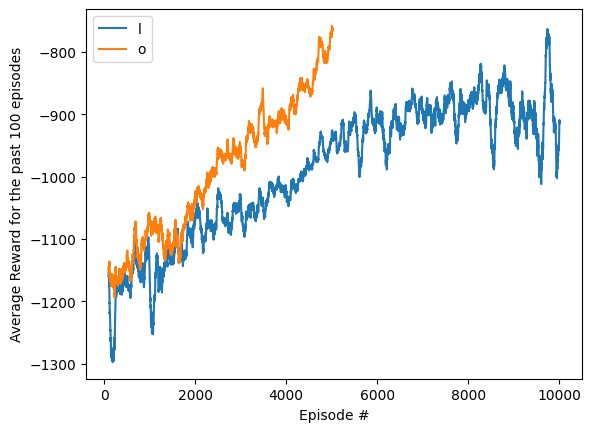

In [6]:
episode_rew_ppo = env.get_episode_rewards()
episode_rew_ppo_2 = env_2.get_episode_rewards()
episode_rew_ppo_ma = (np.convolve(episode_rew_ppo, np.ones(100), "valid") / 100)
episode_rew_ppo_2_ma = (np.convolve(episode_rew_ppo_2, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_rew_ppo)+1), episode_rew_ppo_ma, label="PPO-v1-2e6")
plt.plot(np.arange(100, len(episode_rew_ppo_2)+1), episode_rew_ppo_2_ma, label="PPO-v1-1e6")
plt.ylabel('Average Reward for the past 100 episodes')
plt.xlabel('Episode #')
plt.legend('lower right')
plt.show()

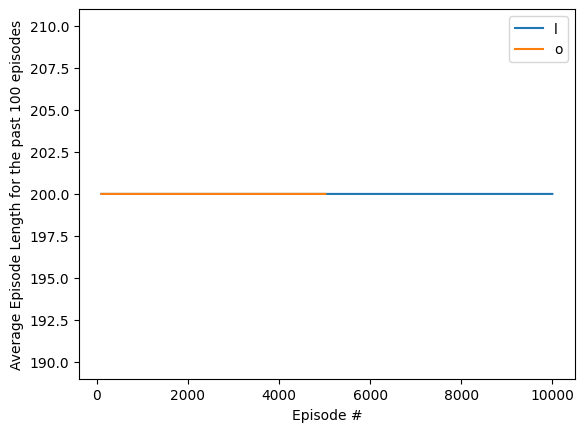

In [7]:
episode_len_ppo = env.get_episode_lengths()
episode_len_ppo_2 = env_2.get_episode_lengths()
episode_len_ppo_ma = (np.convolve(episode_len_ppo, np.ones(100), "valid") / 100)
episode_len_ppo_2_ma = (np.convolve(episode_len_ppo_2, np.ones(100), "valid") / 100)
plt.plot(np.arange(100, len(episode_len_ppo)+1), episode_len_ppo_ma, label="PPO-v1-2e6")
plt.plot(np.arange(100, len(episode_len_ppo_2)+1), episode_len_ppo_2_ma, label="PPO-v1-1e6")
plt.ylabel('Average Episode Length for the past 100 episodes')
plt.xlabel('Episode #')
plt.legend('lower right')
plt.show()

In [8]:
# Evaluate the final agent
eval_env = Monitor(gym.make("Pendulum-v1"))
mean_reward, std_reward = evaluate_policy(ppo_model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"Training steps: 2,000,000 || mean_reward={mean_reward:.2f} +/- {std_reward}")
mean_reward_2, std_reward_2 = evaluate_policy(ppo_model_2, eval_env, n_eval_episodes=10, deterministic=True)
print(f"Training steps: 1,000,000 || mean_reward_2={mean_reward_2:.2f} +/- {std_reward_2}")

Training steps: 2,000,000 || mean_reward=-973.72 +/- 295.7150596212219
Training steps: 1,000,000 || mean_reward_2=-754.08 +/- 69.33684408012485


In [9]:
import glob
import io
import base64
from IPython import display
from IPython.display import HTML
from gym.wrappers.monitoring import video_recorder
import torch

def show_video(video_name):
    mp4list = glob.glob('video/ex1/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/ex1/{}.mp4'.format(video_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(agent, env_name, video_name):
    env = gym.make(env_name, render_mode='rgb_array')
    vid = video_recorder.VideoRecorder(env, path="video/ex1/{}.mp4".format(video_name))
    state, _ = env.reset()
    done, truncated = False, False
    reward_list = []
    while not done and not truncated:
        frame = env.render()

        vid.capture_frame()
        # import pdb; pdb.set_trace()
        action = agent.predict(state)

        state, reward, done, truncated, _ = env.step(action[0])
        reward_list.append(reward)
    vid.close()
    env.close()
    print(np.array(reward_list).sum())

In [10]:
!mkdir video
!mkdir video/ex1

mkdir: video: File exists
mkdir: video/ex1: File exists


In [11]:
saved_model = PPO.load("./ppo-Pendulum-v1-ex1.zip")
saved_model_2 = PPO.load("./ppo-Pendulum-v1-improved-ex1.zip")

In [12]:
show_video_of_model(saved_model, "Pendulum-v1", 'PPO-v1-2e6')
show_video('PPO-v1-2e6')

/Users/keithwang/miniforge3_arm64/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


-1099.6707372138762


In [13]:
show_video_of_model(saved_model_2, "Pendulum-v1", 'PPO-v1-1e6')
show_video('PPO-v1-1e6')

/Users/keithwang/miniforge3_arm64/lib/python3.10/site-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


-796.4207407346403
